1) Predictor and Outcome Variables:

Predictor Variable (X): This is the variable that is used to predict the outcome. It's also known as the independent variable.

Outcome Variable (Y): This is the variable that we are trying to predict or explain. It's also referred to as the dependent variable.

   Slope and Intercept Coefficients:
   
Slope (β1): This coefficient represents the change in the outcome variable for every one-unit change in the predictor variable. It tells you how much Y is expected to increase when X increases by one unit.

Intercept (β0): This is the value of the outcome variable when the predictor variable is zero. It's the starting point of the line on the Y-axis in a graph.
   
   Error Term (ε):
 
The error term accounts for the variability in the outcome variable that cannot be explained by the linear relationship with the predictor variable. It's what makes the relationship probabilistic rather than deterministic.
   

Slope: 1.99
Intercept: 5.22


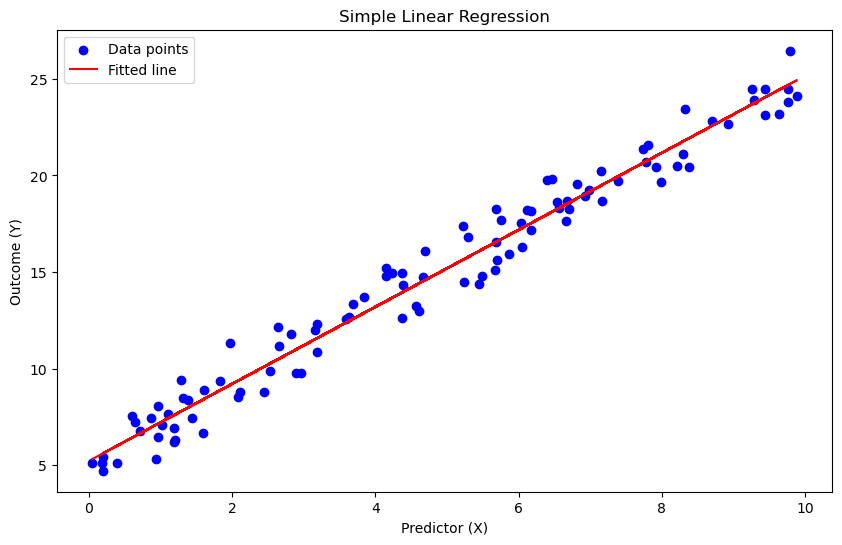

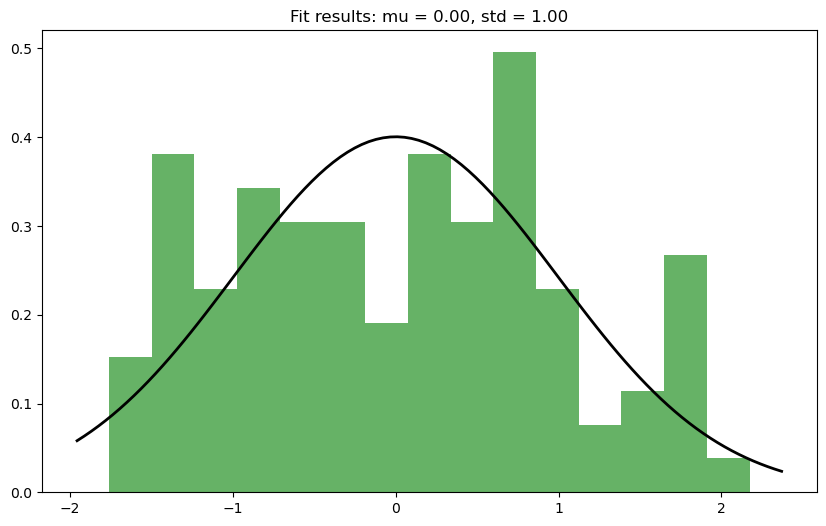

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

# Generate synthetic data
np.random.seed(0)  # For reproducibility
X = np.random.rand(100) * 10  # 100 random numbers scaled to 0-10
true_intercept = 5
true_slope = 2
noise = np.random.randn(100)  # Random noise
Y = true_intercept + true_slope * X + noise  # Linear relation with noise

# Fit the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Print the coefficients
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

# Predict values using the model coefficients
Y_pred = intercept + slope * X

# Plotting the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Fitted line')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Example of the distribution of residuals
residuals = Y - Y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=15, density=True, alpha=0.6, color='g')
# Fit a normal distribution to the residuals
mu, std = stats.norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f}, std = {std:.2f}"
plt.title(title)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     659.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.53e-45
Time:                        02:31:28   Log-Likelihood:                -198.41
No. Observations:                 100   AIC:                             400.8
Df Residuals:                      98   BIC:                             406.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7903      0.353      7.907      0.0

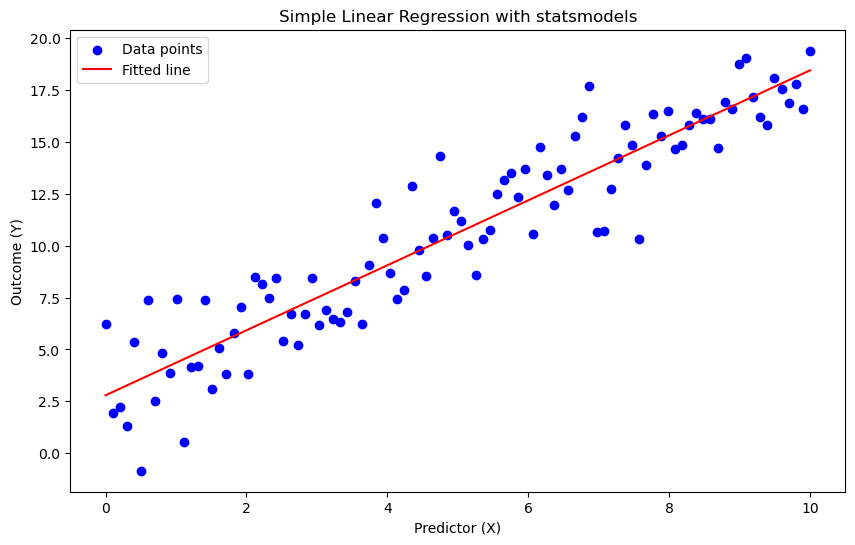

In [2]:
#2)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Step 1: Simulate Data
np.random.seed(1)  # For reproducibility
n = 100
X = np.linspace(0, 10, n)  # 100 points from 0 to 10
true_intercept = 3
true_slope = 1.5
noise = np.random.normal(scale=2.0, size=n)  # Normal distributed noise
Y = true_intercept + true_slope * X + noise  # Linear relationship with noise

# Create a DataFrame
data = pd.DataFrame({
    'X': X,
    'Y': Y
})

# Step 2: Fit a Simple Linear Regression Model
model = smf.ols('Y ~ X', data=data).fit()  # Ordinary Least Squares (OLS) model

# Print model summary
print(model.summary())

# Step 3: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Data points')
plt.plot(data['X'], model.predict(), color='red', label='Fitted line')  # model.predict() to get fitted values
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.title('Simple Linear Regression with statsmodels')
plt.legend()
plt.show()


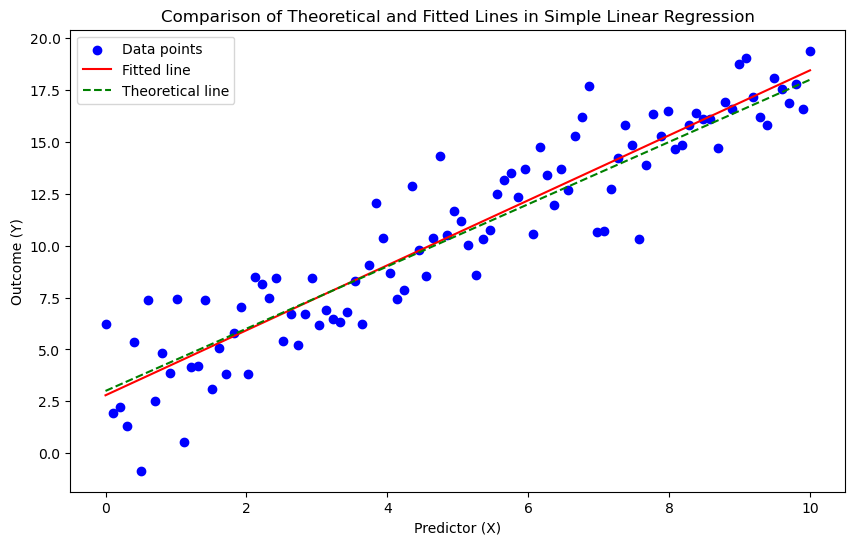

In [4]:
#3) 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Simulate Data
np.random.seed(1)
n = 100
X = np.linspace(0, 10, n)
true_intercept = 3
true_slope = 1.5
noise = np.random.normal(scale=2.0, size=n)
Y = true_intercept + true_slope * X + noise

# Create DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the Simple Linear Regression Model
model = smf.ols('Y ~ X', data=data).fit()

# Theoretical Line (without noise)
Y_theoretical = true_intercept + true_slope * X

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Data points')
plt.plot(X, model.predict(), color='red', label='Fitted line')
plt.plot(X, Y_theoretical, color='green', linestyle='--', label='Theoretical line')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.title('Comparison of Theoretical and Fitted Lines in Simple Linear Regression')
plt.legend()
plt.show()


#3 

The theoretical line is a clean representation, assuming no variability or error in data measurement.
The fitted line, however, is influenced by the random sampling variation in the dataset. It tries to approximate the true relationship but is affected by the randomness in the noise added to the data points. This randomness can cause the estimated slope and intercept to deviate from their true values, as the model attempts to minimize the error across all observed data points.

4) 

In-sample predictions are calculated using the fitted model's coefficients (slope and intercept) derived from the same dataset. These coefficients are calculated such that the sum of the squares of the differences (errors) between observed values and predicted values is minimized.

The theoretical model, on the other hand, uses the true parameters (assumed known) which describe the exact relationship without any error from data variability.where and B0 and B1 bare the true intercept and slope, respectively. In a perfect scenario without any noise, these predictions would match the observed data exactly.




5) 

The "ordinary least squares" (OLS) method, commonly used to fit a line to observed data in linear regression models, chooses the line that minimizes the sum of the squared differences between the observed values and the values predicted by the linear model.
Squaring the Residuals: Squaring each residual (the differences) serves several purposes:

- Non-Negativity: Squares ensure that all terms are positive, which makes it meaningful to sum them.
- Emphasis on Larger Errors: Squaring gives greater weight to larger differences. This weighting scheme is sensitive to outliers and emphasizes fitting larger values more accurately, which might be desirable or not, depending on the context and distribution of
- Differentiability: Squaring the residuals makes the function continuously differentiable, a necessary property for using calculus-based optimization methods to find the minimum of the sum of squared residuals.



#6

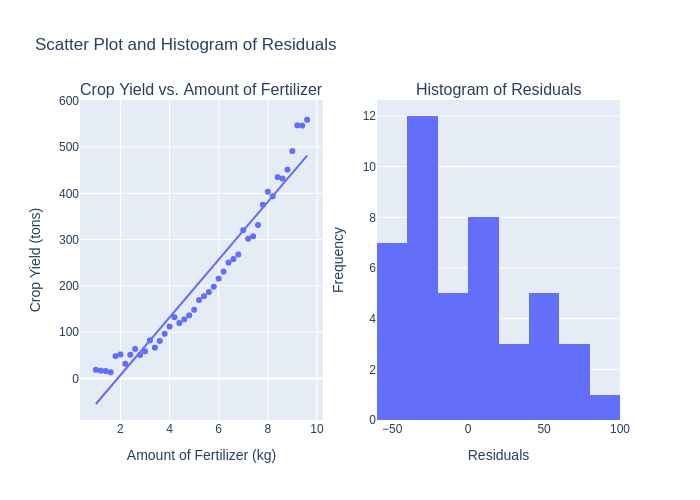

In [7]:
#7)

import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)
fig.show(renderer="png")

Linearity:

The relationship between the amount of fertilizer used and crop yield may not be linear, especially if the crop yield increases exponentially or in another non-linear fashion as fertilizer use increases. The plot could reveal whether the increase in yield per unit of fertilizer remains constant or changes.
Homoscedasticity (Equal Variance):

If the variability of crop yields changes as the amount of fertilizer changes (which can happen if yield increases dramatically at higher fertilizer levels), the assumption of homoscedasticity is violated. This can be seen if the spread of residuals increases with the increase in fertilizer amount.

Normality of Errors:

The residuals (differences between observed and predicted values) should be normally distributed. This assumption is crucial for the validity of hypothesis testing concerning the regression coefficients. The histogram of residuals can show whether the data is skewed or has outliers, indicating potential violations.

Independence of Errors:
    
Residuals should be independent of each other. Any pattern or systematic trend in the sequence of residuals (like cycles or repeated trends) would suggest that this assumption is violated.

No Extreme Outliers:

Outliers can have a disproportionate influence on the fit of a linear model, potentially skewing the regression line away from the true relationship.

In [6]:
#8)
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:10:53   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
8)

- A low p-value suggest that suggests that I can reject the null hypothesis for the associated coefficient.
- The coefficient for waiting suggests thata positive relationship where longer waiting times are associated with longer eruptions. Conversely, a non-significant p-value would indicate that there's not enough evidence to suggest a relationship. 
- A higher R-squared value suggests that the model explains a significant portion of the variability in eruption durations
- The overall F-statistic and its p-value give you an idea about the fit of the model. If the F-statistic is significant, it suggests that the model fits the data better than a model without any predictors.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


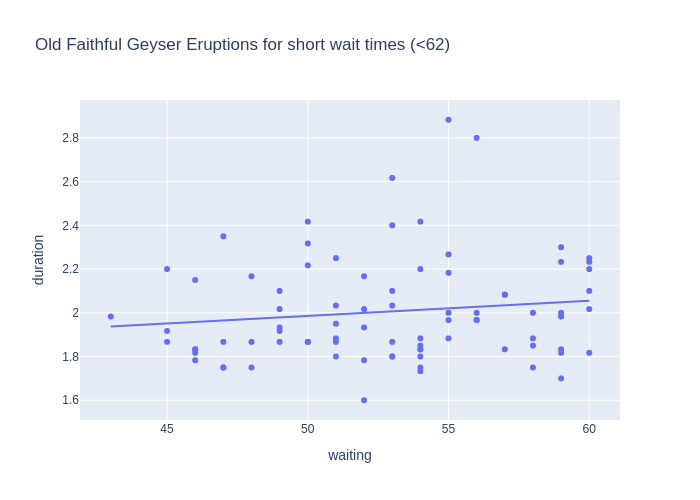

In [8]:
#9)
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")

9)  
Adjusting the short_wait_limit and analyzing the outputs helps determine how the relationship changes with different definitions of "short waits". This segmented analysis can reveal nuances in the geyser’s behavior that are not apparent when considering all data collectively.

Coefficient for waiting: Indicates the estimated change in eruption duration for each additional minute of waiting. A positive coefficient suggests that longer waits are associated with longer eruptions, even within this restricted range. An R-squared value close to that found in the full dataset analysis indicates that the model explains a similar proportion of variance, reinforcing the robustness of waiting time as a predictor within this specific range.


In [20]:
#10) 

import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


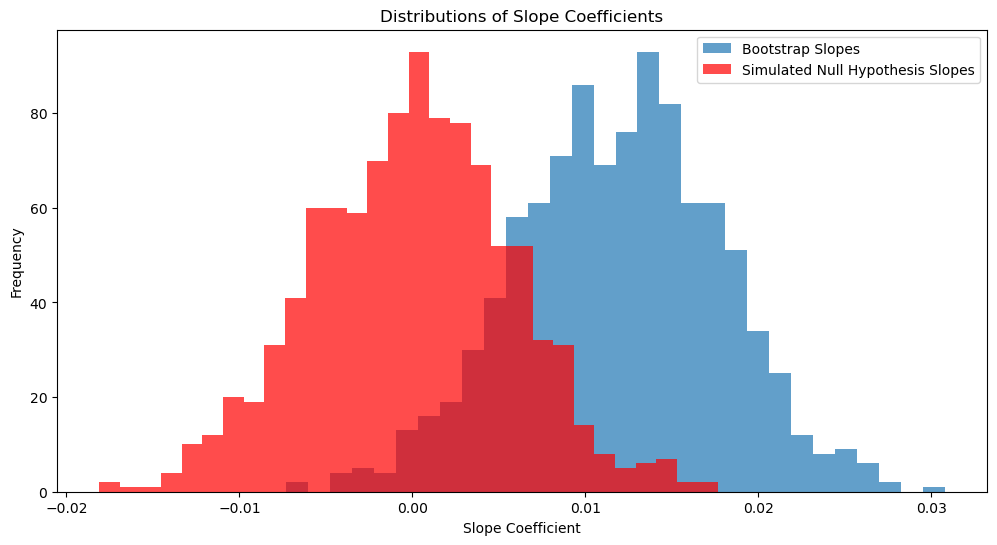

95% bootstrapped confidence interval: [5.67968857e-05 2.34438364e-02]
Simulated p-value: 0.037


In [23]:
#10)   

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats

# Load the dataset
old_faithful = sns.load_dataset('geyser')

# Define the condition for long wait times
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
data_long = old_faithful[long_wait]

# Number of bootstrap samples
n_bootstraps = 1000

# Bootstrap sampling
bootstrap_slope_coefficients = []
for _ in range(n_bootstraps):
    sample = data_long.sample(n=len(data_long), replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    bootstrap_slope_coefficients.append(model.params['waiting'])

# Simulation under null hypothesis
simulated_slope_coefficients = []
for _ in range(n_bootstraps):
    old_faithful_simulation = data_long.copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=len(data_long))
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params['waiting'])

# Visualization of distributions
plt.figure(figsize=(12, 6))
plt.hist(bootstrap_slope_coefficients, bins=30, alpha=0.7, label='Bootstrap Slopes')
plt.hist(simulated_slope_coefficients, bins=30, alpha=0.7, label='Simulated Null Hypothesis Slopes', color='red')
plt.legend()
plt.title('Distributions of Slope Coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.show()

# Calculate 95% confidence interval from bootstrap
conf_interval = np.quantile(bootstrap_slope_coefficients, [0.025, 0.975])
print(f"95% bootstrapped confidence interval: {conf_interval}")

# Calculate p-value for the simulated null hypothesis
original_slope = smf.ols('duration ~ waiting', data=data_long).fit().params['waiting']
p_value = np.mean(np.abs(simulated_slope_coefficients) >= np.abs(original_slope))
print(f"Simulated p-value: {p_value}")


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


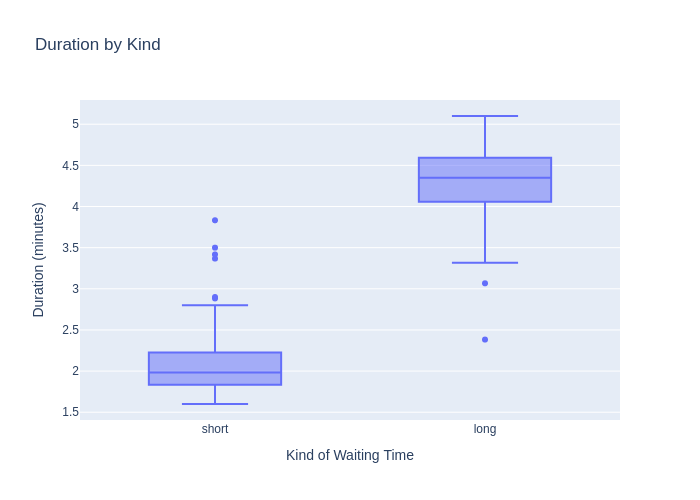

In [25]:
#11)
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from plotly import express as px
from IPython.display import display

# Load the dataset (assuming 'kind' is already part of the dataset; otherwise, we'll create it)
old_faithful = sns.load_dataset('geyser')

# Assuming 'kind' needs to be defined or adjusted as per your previous specification
old_faithful['kind'] = (old_faithful['waiting'] >= 68).map({True: 'long', False: 'short'})

# Fit a linear regression model using 'kind' with 'short' as the reference category
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the summary of the regression model
display(model.summary().tables[1])

# Create a box plot to visualize the relationship between 'kind' and 'duration'
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Duration by Kind',
             category_orders={'kind': ['short', 'long']},
             labels={'duration': 'Duration (minutes)', 'kind': 'Kind of Waiting Time'})
fig.show(renderer="png")  # Ensure compatibility with platforms that require PNG rendering


In [ ]:
11)

The regression output will show if there's a statistically significant difference in mean eruption durations between 'short' and 'long' wait times. If the coefficient for 'long' is significantly different from zero, it indicates a significant effect of wait time length on eruption duration.
The box plot provides a visual representation of the distribution of durations within each kind of waiting time, highlighting differences in medians, spread, and potential outliers.
The p-value associated with the wait_time_kind coefficient in the regression output directly tests this null hypothesis. If the p-value is less than the typical significance level (e.g., 0.05), you reject the null hypothesis, concluding that there is a statistically significant difference in eruption durations between the short and long wait time groups, controlling for the length of the waiting time.








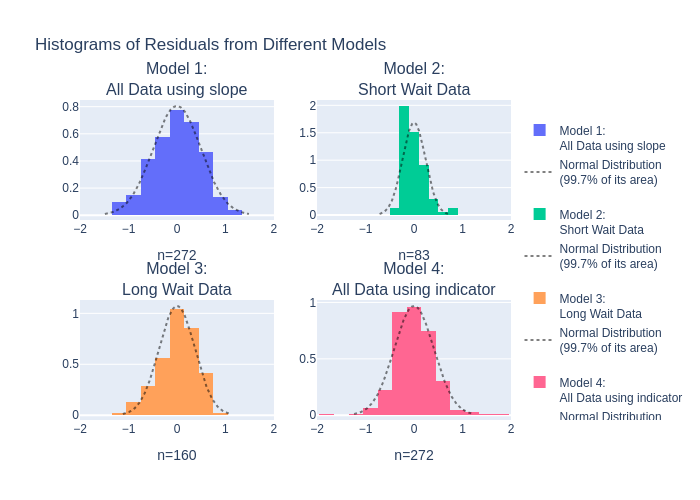

In [32]:
#12)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

In [ ]:
12) Model 1 suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models.
This is because it have residuals that most closely resemble a normal distribution in the plotted histograms.
To definitively assess which model fits best, one would typically look for the histogram that exhibits the highest level of symmetry around zero, the correct bell shape, and appropriately matching tails. The presence of any systematic patterns or deviations from this in the histograms of the other models would suggest violations of the normality assumption, potentially undermining the validity and reliability of statistical inferences made from those models.

In [4]:
# 13)permutation test 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Load the Old Faithful dataset from seaborn's dataset repository
old_faithful = sns.load_dataset('geyser')

# Define short and long wait times using a new threshold
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'long' if x >= 68 else 'short')

# Observing the data
print(old_faithful.head())

# Define the groups for easy access
short_wait = old_faithful['kind'] == 'short'
long_wait = old_faithful['kind'] == 'long'

# Calculate the observed statistic
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Permutation Test
n_permutations = 10000
perm_diffs = []

for _ in range(n_permutations):
    # Shuffle the 'kind' labels and calculate the difference in means
    shuffled_kinds = np.random.permutation(old_faithful['kind'])
    old_faithful['kind_shuffled'] = shuffled_kinds
    perm_mean_diff = old_faithful.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    perm_diffs.append(perm_mean_diff)

# Calculate p-value
p_value = np.mean([abs(diff) >= abs(observed_diff) for diff in perm_diffs])
print(f"P-value from permutation test: {p_value}")

# Two-sample Bootstrapping
n_bootstraps = 10000
bootstrap_diffs = []

for _ in range(n_bootstraps):
    # Bootstrap sampling within each group
    bootstrapped = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    boot_mean_diff = bootstrapped.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrap_diffs.append(boot_mean_diff)

# Calculate 95% confidence interval
conf_interval = np.quantile(bootstrap_diffs, [0.025, 0.975])
print(f"95% Confidence Interval from bootstrapping: {conf_interval}")



   duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long
P-value from permutation test: 0.0
95% Confidence Interval from bootstrapping: [2.10094757 2.30116967]


In [5]:
#13 confidence Interval


import pandas as pd
import numpy as np
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define short and long wait times
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'long' if x >= 68 else 'short')

# Separate data into groups
short_data = old_faithful[old_faithful['kind'] == 'short']['duration']
long_data = old_faithful[old_faithful['kind'] == 'long']['duration']

# Define the number of bootstraps
n_bootstraps = 10000
mean_differences = []

# Perform bootstrapping
for _ in range(n_bootstraps):
    # Bootstrap samples from each group
    boot_short = np.random.choice(short_data, size=len(short_data), replace=True)
    boot_long = np.random.choice(long_data, size=len(long_data), replace=True)
    
    # Calculate means
    mean_short = np.mean(boot_short)
    mean_long = np.mean(boot_long)
    
    # Calculate the difference in means
    mean_differences.append(mean_long - mean_short)

# Calculate the 95% confidence interval
conf_interval = np.quantile(mean_differences, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for the difference in means: {conf_interval}")


95% Bootstrap Confidence Interval for the difference in means: [2.10158806 2.30067089]


In [ ]:
#13 

Data Segmentation: Data is categorized into 'short' and 'long' based on a threshold for wait times (in this case, 68 minutes).
Bootstrap Sampling: For each iteration, the data from each group is sampled with replacement, which means some observations may be repeated, and others left out, to mimic the process of obtaining new sample sets from the same population.
Mean Calculation: The mean of each bootstrap sample is calculated separately for each group.
Difference Calculation: The difference between the means of the long wait times and the short wait times is calculated for each bootstrap iteration.
Confidence Interval: The 2.5th and 97.5th percentiles of the bootstrapped mean differences are calculated, providing boundaries within which the true mean difference is expected to lie 95% of the time under the assumption that the sample accurately reflects the population.

14) Yes, I have look over the wiki-textbook and interacted with chatbot 

here is the link for my chatbot: https://chatgpt.com/c/671ee89f-9f80-8013-af87-c69433e28586